In [2]:
from jax import numpy as jnp, random
import matplotlib.pyplot as plt

from lqg.model import LQG

# Inverse optimal control for continuous psychophysics

## Modeling a tracking task

Linear-Gaussian stochastic dynamical system:
$$
\mathbf x_{t+1} = A \mathbf x_t + B \mathbf u_t + V \mathbf \epsilon_t, \; \mathbf\epsilon_t \sim \mathcal{N}(0, I)
$$

Linear-Gaussian observation model
$$
\mathbf y_t = C \mathbf x_t + W \mathbf \eta_t, \; \mathbf\eta_t \sim \mathcal{N}(0, I)
$$

In [3]:
dt = 1. / 60.

# parameters
action_variability = 0.5
sigma = 6.
sigma_prop = 3.

A = jnp.eye(2)
B = jnp.array([[0.], [dt]])
V = jnp.diag(jnp.array([1., action_variability]))

C = jnp.eye(2)
W = jnp.diag(jnp.array([sigma, sigma_prop]))

## Cost function

$$
J = \sum_t \mathbf x_t^T Q \mathbf x_t + \mathbf u_t^T R \mathbf u_t
$$

In [4]:
action_cost = 0.5

Q = jnp.array([[1., -1.],
               [-1., 1]])

R = jnp.eye(1) * action_cost

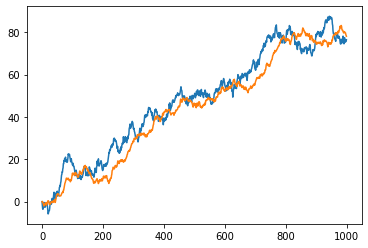

In [5]:
from lqg.model import LQG

lqg = LQG(A, B, C, V, W, Q, R)

x = lqg.simulate(random.PRNGKey(0), x0=jnp.zeros(2), T=1000)

plt.plot(x[:, 0, 0])
plt.plot(x[:, 0, 1])